# CSCE 554 Project
# Marvin Newlin
# 6 Sep 19

In [124]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
import seaborn
import probscale
alpha = 0.05

### Import Data

In [125]:
# Import HPC Singularity Data for each benchmark
infile = 'project_data_all.xlsx'
all_data = pd.read_excel(infile,sheet_name='data', dtype=np.float64)


n=20
names = all_data.columns

display(all_data)


,SA_HPC_Singularity,SA_HPC_Native,SA_DL_Singularity,SA_DL_Native,recommendation_HPC_Singularity,recommendation_HPC_Native,recommendation_dl_Singularity,recommendation_dl_Native,translation_HPC_Singularity,translation_HPC_Native,translation_dl_Singularity,translation_dl_Native,rnn_HPC_Singularity,rnn_HPC_Native,rnn_dl_Singularity,rnn_dl_Native
0,163.0,161.0,347.0,346.0,9868.0,9771.0,12668.0,8335.0,16615.0,16588.0,13279.0,13374.0,70293.0,70266.0,5882.0,5003.0
1,163.0,162.0,352.0,350.0,9841.0,9829.0,12195.0,8426.0,16602.0,16294.0,13310.0,13255.0,70292.0,70443.0,5973.0,5148.0
2,163.0,162.0,351.0,347.0,9874.0,9830.0,12394.0,8450.0,16277.0,16321.0,13180.0,13205.0,70273.0,70287.0,5869.0,5160.0
3,163.0,162.0,351.0,350.0,9858.0,9827.0,12476.0,8496.0,16285.0,16373.0,13394.0,13188.0,70337.0,70384.0,5797.0,5150.0
4,163.0,162.0,352.0,350.0,9891.0,9856.0,12463.0,8552.0,16267.0,16341.0,13346.0,13636.0,70315.0,70268.0,5875.0,5043.0
5,164.0,162.0,350.0,348.0,9866.0,9878.0,12357.0,8485.0,16252.0,16244.0,13568.0,13265.0,70304.0,70322.0,5970.0,5147.0
6,163.0,162.0,352.0,349.0,9856.0,9904.0,12639.0,8550.0,16269.0,16261.0,13214.0,13217.0,70295.0,70316.0,5825.0,5158.0
7,163.0,162.0,366.0,364.0,9853.0,9869.0,12368.0,8530.0,16312.0,16309.0,13845.0,14132.0,70305.0,70285.0,5808.0,5148.0
8,289.0,162.0,351.0,349.0,9924.0,9904.0,12631.0,8595.0,16304.0,16291.0,13839.0,14088.0,70285.0,70280.0,5965.0,4995.0
9,163.0,162.0,353.0,350.0,9821.0,10327.0,12625.0,8276.0,16304.0,16297.0,13818.0,14050.0,70332.0,70302.0,5983.0,5135.0


In [126]:
hpc_treat_sing = np.array(all_data.loc[:,['SA_HPC_Singularity','recommendation_HPC_Singularity','translation_HPC_Singularity','rnn_HPC_Singularity']])
hpc_treat_native = np.array(all_data.loc[:,['SA_HPC_Native','recommendation_HPC_Native','translation_HPC_Native','rnn_HPC_Native']])

In [127]:
dl_treat_sing = np.array(all_data.loc[:,['SA_DL_Singularity','recommendation_dl_Singularity','translation_dl_Singularity','rnn_dl_Singularity']])
dl_treat_native = np.array(all_data.loc[:,['SA_DL_Native','recommendation_dl_Native','translation_dl_Native','rnn_dl_Native']])



## HPC Results ANOVA

(2, 4, 20)


### ANOVA Results

,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
Treatments,1.000141e+04,1.0,10001.4,0.718353,3.90215,0.397991
Blocks,1.188882e+11,3.0,3.96294e+10,,,
Error,2.158016e+06,155.0,13922.7,,,
Total,1.188904e+11,159.0,,,,


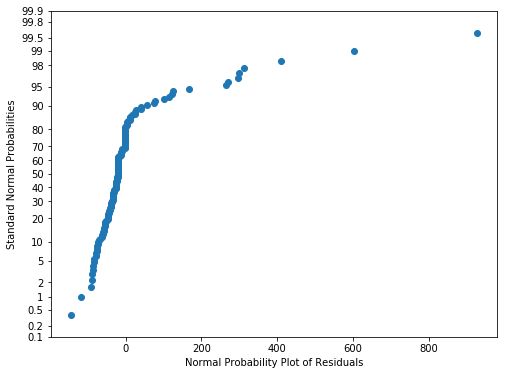

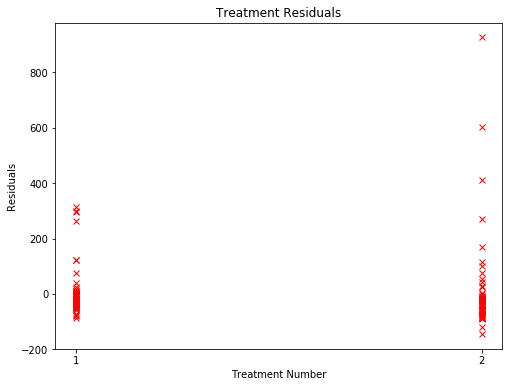

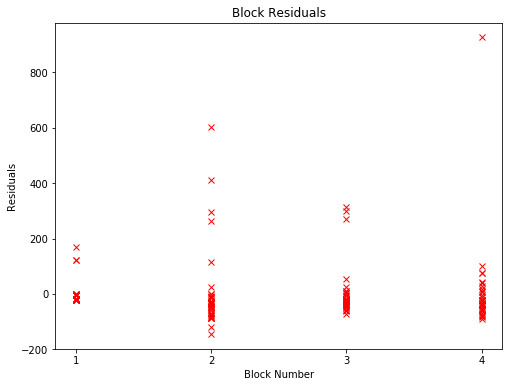

In [128]:
num_blocks = 4
num_treatments = 2
n = 20
data = np.array([hpc_treat_sing.T,hpc_treat_native.T])
print(data.shape)

N = num_treatments*num_blocks*n

### Sum of Squares
SST = np.sum(np.square(data - np.mean(data)))

treat_diffs = np.ones(num_treatments)

block_diffs = np.ones(num_blocks)

for i in range(num_treatments):
        treat_diffs[i] = np.square(np.sum(data[i]))
for j in range(num_blocks):
        block_diffs[j] = np.square(np.sum(data[:,j,:]))
            
SSTreat = (1/(num_blocks*n))*np.sum(treat_diffs) - (np.square(np.sum(data))/N)            
SSBlocks = (1/(num_treatments*n))*np.sum(block_diffs) - (np.square(np.sum(data))/N)


SSE = SST - SSTreat - SSBlocks

sum_squares = np.array([SSTreat, SSBlocks, SSE, SST])

# Degrees of Freedom
total_df = N-1
treatment_df = num_treatments-1
block_df = num_blocks-1
error_df = total_df - treatment_df - block_df
DF = np.array([treatment_df, block_df, error_df,total_df])

# Mean Squares
mean_squares = np.ones(4)
for i in range(4-1):
    mean_squares[i] = sum_squares[i]/DF[i]
mean_squares[3:]=0

# F Value & p-value
f_vals = np.ones(4)
f_vals[1:]=0
p_vals = np.ones(4)
p_vals[1:]=0
f_crits = np.ones(4)
f_crits[1:]=0

MSE = mean_squares[2]
DFE = DF[2]
F0 = mean_squares[0]/MSE
f_vals[0] = F0
f_crits[0] = stats.f.ppf(1-alpha,DF[0],DFE)
p_vals[0] = 1 - stats.f.cdf(F0, DF[0],DFE)
names=['Treatments','Blocks','Error','Total']

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(md("### ANOVA Results"))
display(vals_df)

## Residuals
resid = np.zeros(data.shape)
for i in range(num_treatments):
    for j in range(num_blocks):
        resid[i,j] = data[i,j] - data[i].mean()-data[:,j].mean()+data.mean()
        
fig = plt.figure(figsize=(8,6))
probscale.probplot(resid,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Residuals")
plt.savefig('project_figures/hpc_resid_normplot_untransformed.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_treatments):
    plt.plot(np.full((num_blocks,1), fill_value=i+1),resid[i],'rx')
plt.xlabel("Treatment Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_treatments+1,1))
plt.title("Treatment Residuals")
plt.savefig('project_figures/hpc_resid_treat_untransformed.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_blocks):
    plt.plot(np.full((num_treatments,1), fill_value=i+1),resid[:,i],'rx')
plt.xlabel("Block Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_blocks+1,1))
plt.title("Block Residuals")
plt.savefig('project_figures/hpc_resid_block_untransformed.png')
plt.show()

## DL Results

(2, 4, 20)


### ANOVA Results

,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
Treatments,5.428318e+07,1.0,5.42832e+07,68.2602,3.90215,5.9619e-14
Blocks,4.011194e+09,3.0,1.33706e+09,,,
Error,1.232621e+08,155.0,795239,,,
Total,4.188740e+09,159.0,,,,


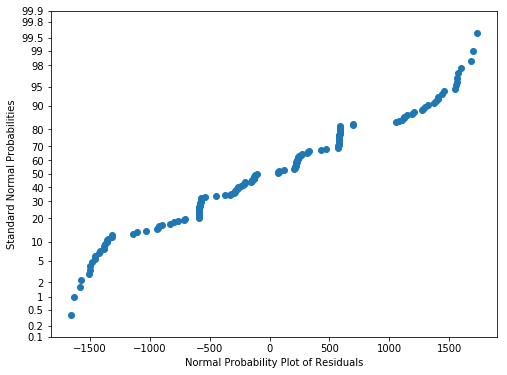

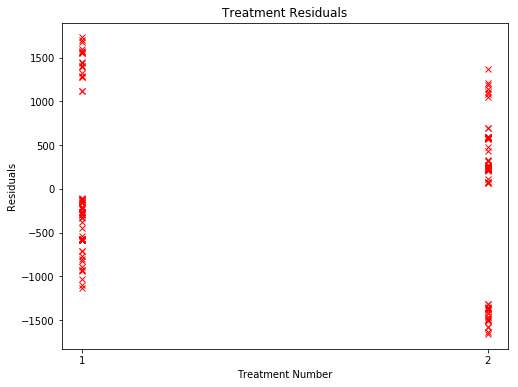

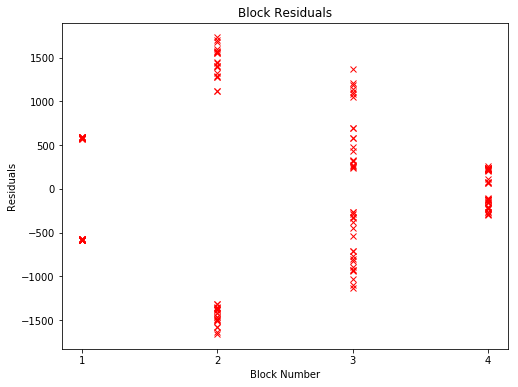

In [129]:
num_blocks = 4
num_treatments = 2
n = 20
data = np.array([dl_treat_sing.T,dl_treat_native.T])
print(data.shape)

N = num_treatments*num_blocks*n

### Sum of Squares
SST = np.sum(np.square(data - np.mean(data)))

treat_diffs = np.ones(num_treatments)

block_diffs = np.ones(num_blocks)

for i in range(num_treatments):
        treat_diffs[i] = np.square(np.sum(data[i]))
for j in range(num_blocks):
        block_diffs[j] = np.square(np.sum(data[:,j,:]))
            
SSTreat = (1/(num_blocks*n))*np.sum(treat_diffs) - (np.square(np.sum(data))/N)            
SSBlocks = (1/(num_treatments*n))*np.sum(block_diffs) - (np.square(np.sum(data))/N)


SSE = SST - SSTreat - SSBlocks

sum_squares = np.array([SSTreat, SSBlocks, SSE, SST])

# Degrees of Freedom
total_df = N-1
treatment_df = num_treatments-1
block_df = num_blocks-1
error_df = total_df - treatment_df - block_df
DF = np.array([treatment_df, block_df, error_df,total_df])

# Mean Squares
mean_squares = np.ones(4)
for i in range(4-1):
    mean_squares[i] = sum_squares[i]/DF[i]
mean_squares[3:]=0

# F Value & p-value
f_vals = np.ones(4)
f_vals[1:]=0
p_vals = np.ones(4)
p_vals[1:]=0
f_crits = np.ones(4)
f_crits[1:]=0

MSE = mean_squares[2]
DFE = DF[2]
F0 = mean_squares[0]/MSE
f_vals[0] = F0
f_crits[0] = stats.f.ppf(1-alpha,DF[0],DFE)
p_vals[0] = 1 - stats.f.cdf(F0, DF[0],DFE)
names=['Treatments','Blocks','Error','Total']

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(md("### ANOVA Results"))
display(vals_df)


## Residuals
resid = np.zeros(data.shape)
for i in range(num_treatments):
    for j in range(num_blocks):
        resid[i,j] = data[i,j] - data[i].mean()-data[:,j].mean()+data.mean()
        
fig = plt.figure(figsize=(8,6))
probscale.probplot(resid,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Residuals")
plt.savefig('project_figures/dl_resid_normplot_untransformed.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_treatments):
    plt.plot(np.full((num_blocks,1), fill_value=i+1),resid[i],'rx')
plt.xlabel("Treatment Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_treatments+1,1))
plt.title("Treatment Residuals")
plt.savefig('project_figures/dl_resid_treat_untransformed.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_blocks):
    plt.plot(np.full((num_treatments,1), fill_value=i+1),resid[:,i],'rx')
plt.xlabel("Block Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_blocks+1,1))
plt.title("Block Residuals")
plt.savefig('project_figures/dl_resid_block_untransformed.png')
plt.show()

# Redo ANOVA with Transformed Data

## HPC

(2, 4, 20)


### ANOVA Results

,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
Treatments,0.001518,1.0,0.00151835,0.20225,3.90215,0.653539
Blocks,798.244580,3.0,266.082,,,
Error,1.163631,155.0,0.0075073,,,
Total,799.409730,159.0,,,,


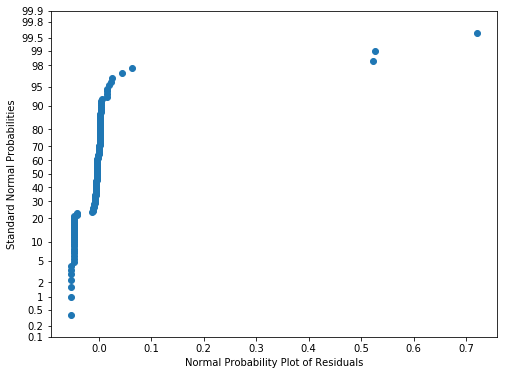

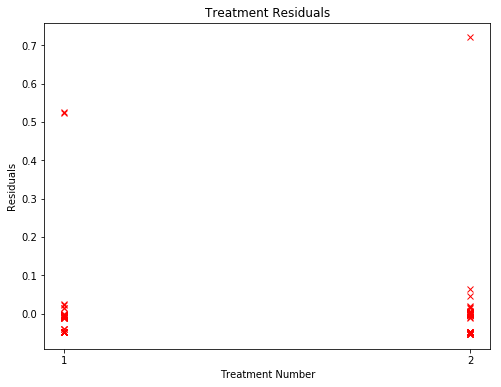

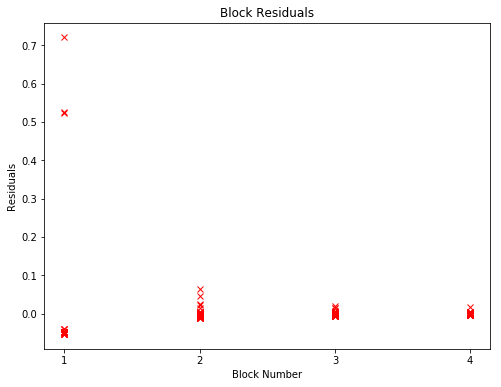

In [130]:
num_blocks = 4
num_treatments = 2
n = 20
data = np.array([np.log(hpc_treat_sing.T),np.log(hpc_treat_native.T)])
print(data.shape)

N = num_treatments*num_blocks*n

### Sum of Squares
SST = np.sum(np.square(data - np.mean(data)))

treat_diffs = np.ones(num_treatments)

block_diffs = np.ones(num_blocks)

for i in range(num_treatments):
        treat_diffs[i] = np.square(np.sum(data[i]))
for j in range(num_blocks):
        block_diffs[j] = np.square(np.sum(data[:,j,:]))
            
SSTreat = (1/(num_blocks*n))*np.sum(treat_diffs) - (np.square(np.sum(data))/N)            
SSBlocks = (1/(num_treatments*n))*np.sum(block_diffs) - (np.square(np.sum(data))/N)


SSE = SST - SSTreat - SSBlocks

sum_squares = np.array([SSTreat, SSBlocks, SSE, SST])

# Degrees of Freedom
total_df = N-1
treatment_df = num_treatments-1
block_df = num_blocks-1
error_df = total_df - treatment_df - block_df
DF = np.array([treatment_df, block_df, error_df,total_df])

# Mean Squares
mean_squares = np.ones(4)
for i in range(4-1):
    mean_squares[i] = sum_squares[i]/DF[i]
mean_squares[3:]=0

# F Value & p-value
f_vals = np.ones(4)
f_vals[1:]=0
p_vals = np.ones(4)
p_vals[1:]=0
f_crits = np.ones(4)
f_crits[1:]=0

MSE = mean_squares[2]
DFE = DF[2]
F0 = mean_squares[0]/MSE
f_vals[0] = F0
f_crits[0] = stats.f.ppf(1-alpha,DF[0],DFE)
p_vals[0] = 1 - stats.f.cdf(F0, DF[0],DFE)
names=['Treatments','Blocks','Error','Total']

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(md("### ANOVA Results"))
display(vals_df)

## Residuals
resid = np.zeros(data.shape)
for i in range(num_treatments):
    for j in range(num_blocks):
        resid[i,j] = data[i,j] - data[i].mean()-data[:,j].mean()+data.mean()
        
fig = plt.figure(figsize=(8,6))
probscale.probplot(resid,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Residuals")
plt.savefig('project_figures/hpc_resid_normplot.png')
plt.show()
fig = plt.figure(figsize=(8,6))
for i in range(num_treatments):
    plt.plot(np.full((num_blocks,1), fill_value=i+1),resid[i],'rx')
plt.xlabel("Treatment Number")
plt.xticks(np.arange(1,num_treatments+1,1))
plt.ylabel("Residuals")
plt.title("Treatment Residuals")
plt.savefig('project_figures/hpc_resid_treat.png')
plt.show()

fig = plt.figure(figsize=(8,6))

for i in range(num_blocks):
    plt.plot(np.full((num_treatments,1), fill_value=i+1),resid[:,i],'rx')
    
plt.xlabel("Block Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_blocks+1,1))
plt.title("Block Residuals")
plt.savefig('project_figures/hpc_resid_block.png')
plt.show()

## DL

(2, 4, 20)


### ANOVA Results

,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
Treatments,1496.330757,1.0,1496.33,80.505,3.90215,8.88178e-16
Blocks,222240.299410,3.0,74080.1,,,
Error,2880.956080,155.0,18.5868,,,
Total,226617.586247,159.0,,,,


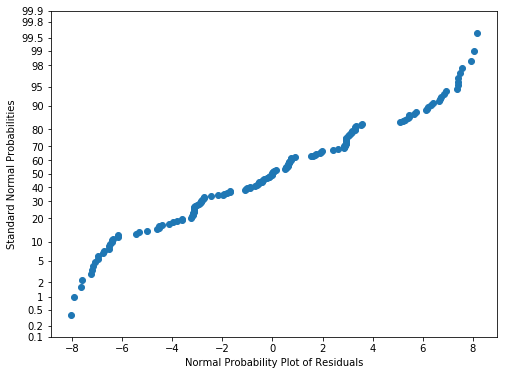

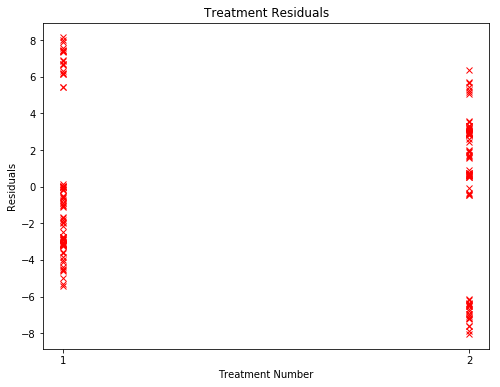

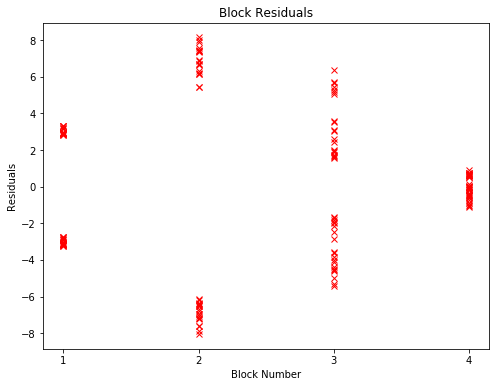

In [131]:
num_blocks = 4
num_treatments = 2
n = 20
data = np.array([np.sqrt(dl_treat_sing.T),np.sqrt(dl_treat_native.T)])
print(data.shape)

N = num_treatments*num_blocks*n

### Sum of Squares
SST = np.sum(np.square(data - np.mean(data)))

treat_diffs = np.ones(num_treatments)

block_diffs = np.ones(num_blocks)

for i in range(num_treatments):
        treat_diffs[i] = np.square(np.sum(data[i]))
for j in range(num_blocks):
        block_diffs[j] = np.square(np.sum(data[:,j,:]))
            
SSTreat = (1/(num_blocks*n))*np.sum(treat_diffs) - (np.square(np.sum(data))/N)            
SSBlocks = (1/(num_treatments*n))*np.sum(block_diffs) - (np.square(np.sum(data))/N)


SSE = SST - SSTreat - SSBlocks

sum_squares = np.array([SSTreat, SSBlocks, SSE, SST])

# Degrees of Freedom
total_df = N-1
treatment_df = num_treatments-1
block_df = num_blocks-1
error_df = total_df - treatment_df - block_df
DF = np.array([treatment_df, block_df, error_df,total_df])

# Mean Squares
mean_squares = np.ones(4)
for i in range(4-1):
    mean_squares[i] = sum_squares[i]/DF[i]
mean_squares[3:]=0

# F Value & p-value
f_vals = np.ones(4)
f_vals[1:]=0
p_vals = np.ones(4)
p_vals[1:]=0
f_crits = np.ones(4)
f_crits[1:]=0

MSE = mean_squares[2]
DFE = DF[2]
F0 = mean_squares[0]/MSE
f_vals[0] = F0
f_crits[0] = stats.f.ppf(1-alpha,DF[0],DFE)
p_vals[0] = 1 - stats.f.cdf(F0, DF[0],DFE)
names=['Treatments','Blocks','Error','Total']

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, p_vals])
vals_df = pd.DataFrame(data=vals_data.T, index=names, 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(md("### ANOVA Results"))
display(vals_df)

## Residuals
resid = np.zeros(data.shape)
for i in range(num_treatments):
    for j in range(num_blocks):
        resid[i,j] = data[i,j] - data[i].mean()-data[:,j].mean()+data.mean()
        
fig = plt.figure(figsize=(8,6))
probscale.probplot(resid,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)
plt.xlabel("Normal Probability Plot of Residuals")
plt.savefig('project_figures/dl_resid_normplot.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_treatments):
    plt.plot(np.full((num_blocks,1), fill_value=i+1),resid[i],'rx')
plt.xlabel("Treatment Number")
plt.ylabel("Residuals")
plt.title("Treatment Residuals")
plt.xticks(np.arange(1,num_treatments+1,1))
plt.savefig('project_figures/dl_resid_treat.png')
plt.show()

fig = plt.figure(figsize=(8,6))
for i in range(num_blocks):
    plt.plot(np.full((num_treatments,1), fill_value=i+1),resid[:,i],'rx')
plt.xlabel("Block Number")
plt.ylabel("Residuals")
plt.xticks(np.arange(1,num_blocks+1,1))
plt.title("Block Residuals")
plt.savefig('project_figures/dl_resid_block.png')
plt.show()